In [144]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
# plots created with matplotlib appear inside the notebook instead of opening a new window

In [145]:
# loading the date from csv file
df = pd.read_csv("Car details v3.csv") # df is an abbreviation for data frame

In [146]:
# the top 5 rows of the data
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [147]:
# convert the strings into numbers
df['mileage'] = df['mileage'].str.replace(' kmpl', '', regex = False)
df['mileage'] = pd.to_numeric(df['mileage'], errors = 'coerce')

df['engine'] = df['engine'].str.replace(' CC', '', regex = False)
df['engine'] = pd.to_numeric(df['engine'], errors = 'coerce')

df['max_power'] = df['max_power'].str.replace(' bhp', '', regex = False)
df['max_power'] = pd.to_numeric(df['max_power'], errors = 'coerce')
# remove torque column
df.drop('torque', axis = 1, inplace = True)

In [148]:
# top 15 rows
df.head(15)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0
5,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14,1197.0,81.86,5.0
6,Maruti Wagon R LXI DUO BSIII,2007,96000,175000,LPG,Individual,Manual,First Owner,NaN,1061.0,57.50,5.0
7,Maruti 800 DX BSII,2001,45000,5000,Petrol,Individual,Manual,Second Owner,16.10,796.0,37.00,4.0
8,Toyota Etios VXD,2011,350000,90000,Diesel,Individual,Manual,First Owner,23.59,1364.0,67.10,5.0
9,Ford Figo Diesel Celebration Edition,2013,200000,169000,Diesel,Individual,Manual,First Owner,20.00,1399.0,68.10,5.0


In [149]:
# the number of rows (cars) and columns (features, attributes, or aspects)
df.shape

(8128, 12)

In [150]:
# checking for null values
df.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          309
engine           221
max_power        216
seats            221
dtype: int64

In [151]:
df.describe()

,year,selling_price,km_driven,mileage,engine,max_power,seats
count,8128.000000,8.128000e+03,8.128000e+03,7819.000000,7907.000000,7912.000000,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,19.390375,1458.625016,91.517919,5.416719
std,4.044249,8.062534e+05,5.655055e+04,4.001777,503.916303,35.822499,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,0.000000,624.000000,0.000000,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,16.780000,1197.000000,68.050000,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,19.300000,1248.000000,82.000000,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,22.320000,1582.000000,102.000000,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,42.000000,3604.000000,400.000000,14.000000


In [152]:
# changing the year to how old is the car
df['num_year'] = 2026 - df['year']
df.drop('year', axis = 1, inplace = True)

In [153]:
df.head()

,name,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,num_year
0,Maruti Swift Dzire VDI,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0,12
1,Skoda Rapid 1.5 TDI Ambition,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,12
2,Honda City 2017-2020 EXi,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0,20
3,Hyundai i20 Sportz Diesel,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0,16
4,Maruti Swift VXI BSIII,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0,19


In [154]:
df['fuel'].value_counts()

fuel
Diesel    4402
Petrol    3631
CNG         57
LPG         38
Name: count, dtype: int64

In [155]:
df['seller_type'].value_counts()

seller_type
Individual          6766
Dealer              1126
Trustmark Dealer     236
Name: count, dtype: int64

In [156]:
df['transmission'].value_counts()

transmission
Manual       7078
Automatic    1050
Name: count, dtype: int64

In [157]:
df['owner'].value_counts()

owner
First Owner             5289
Second Owner            2105
Third Owner              555
Fourth & Above Owner     174
Test Drive Car             5
Name: count, dtype: int64

In [158]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   str    
 1   selling_price  8128 non-null   int64  
 2   km_driven      8128 non-null   int64  
 3   fuel           8128 non-null   str    
 4   seller_type    8128 non-null   str    
 5   transmission   8128 non-null   str    
 6   owner          8128 non-null   str    
 7   mileage        7819 non-null   float64
 8   engine         7907 non-null   float64
 9   max_power      7912 non-null   float64
 10  seats          7907 non-null   float64
 11  num_year       8128 non-null   int64  
dtypes: float64(4), int64(3), str(5)
memory usage: 762.1 KB


<Axes: xlabel='fuel', ylabel='count'>

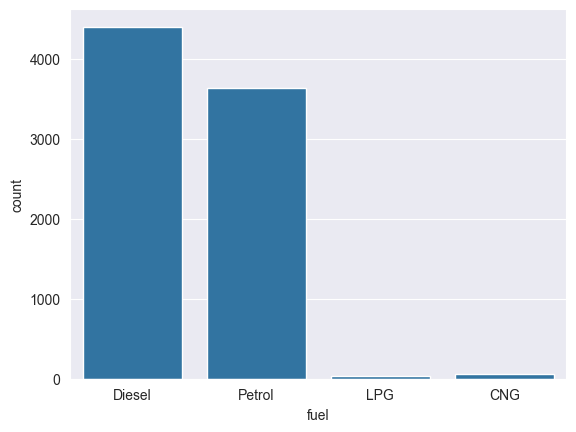

In [159]:
sns.countplot(x = 'fuel', data = df)

<Axes: xlabel='seller_type', ylabel='count'>

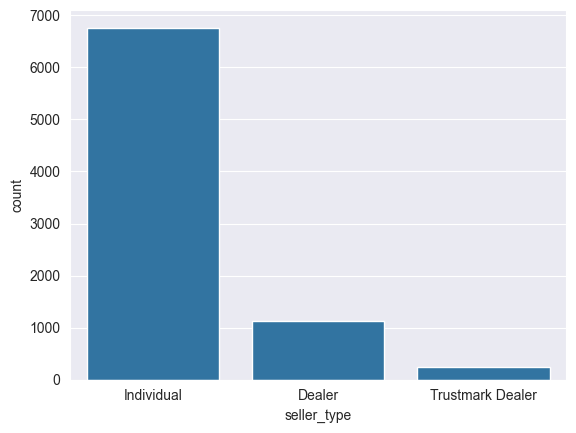

In [160]:
sns.countplot(x = 'seller_type', data = df)

<Axes: xlabel='transmission', ylabel='count'>

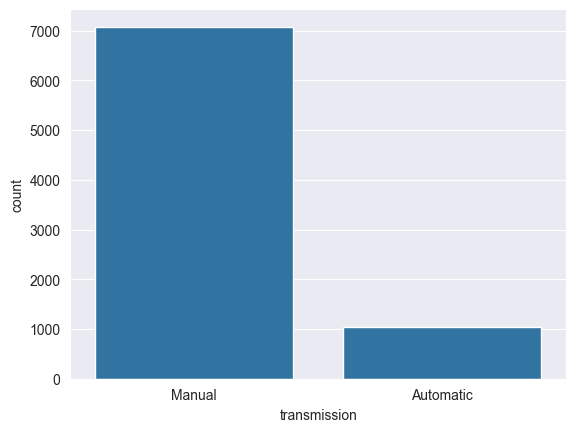

In [161]:
sns.countplot(x = 'transmission', data = df)

<Axes: xlabel='owner', ylabel='count'>

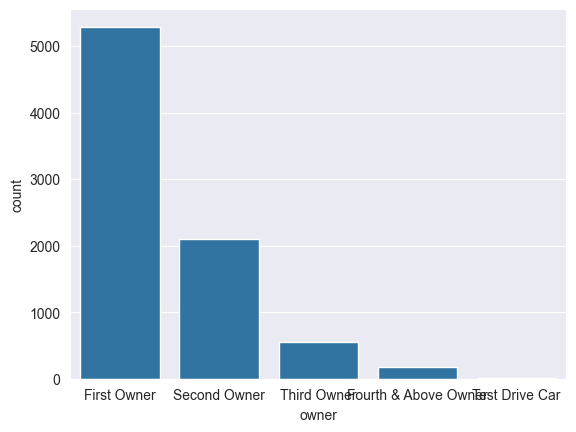

In [162]:
sns.countplot(x = 'owner', data = df)

In [163]:
# changing categorial values into numbers
df.replace({'fuel':{'Diesel':0, 'Petrol':1, 'CNG':2, 'LPG':3}}, inplace = True)
df.replace({'seller_type':{'Individual':0, 'Dealer':1, 'Trustmark Dealer':2}}, inplace = True)
df.replace({'transmission':{'Manual':0, 'Automatic':1}}, inplace = True)
df.replace({'owner':{'First Owner':0, 'Second Owner':1, 'Third Owner':2, 'Fourth & Above Owner':3, 'Test Drive Car':4}}, inplace = True)
df['fuel'] = pd.to_numeric(df['fuel'], errors='coerce')
df['seller_type'] = pd.to_numeric(df['seller_type'], errors='coerce')
df['transmission'] = pd.to_numeric(df['transmission'], errors='coerce')
df['owner'] = pd.to_numeric(df['owner'], errors='coerce')

In [164]:
df.head(50)

,name,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,num_year
0,Maruti Swift Dzire VDI,450000,145500,0,0,0,0,23.40,1248.0,74.00,5.0,12
1,Skoda Rapid 1.5 TDI Ambition,370000,120000,0,0,0,1,21.14,1498.0,103.52,5.0,12
2,Honda City 2017-2020 EXi,158000,140000,1,0,0,2,17.70,1497.0,78.00,5.0,20
3,Hyundai i20 Sportz Diesel,225000,127000,0,0,0,0,23.00,1396.0,90.00,5.0,16
4,Maruti Swift VXI BSIII,130000,120000,1,0,0,0,16.10,1298.0,88.20,5.0,19
5,Hyundai Xcent 1.2 VTVT E Plus,440000,45000,1,0,0,0,20.14,1197.0,81.86,5.0,9
6,Maruti Wagon R LXI DUO BSIII,96000,175000,3,0,0,0,NaN,1061.0,57.50,5.0,19
7,Maruti 800 DX BSII,45000,5000,1,0,0,1,16.10,796.0,37.00,4.0,25
8,Toyota Etios VXD,350000,90000,0,0,0,0,23.59,1364.0,67.10,5.0,15
9,Ford Figo Diesel Celebration Edition,200000,169000,0,0,0,0,20.00,1399.0,68.10,5.0,13


In [165]:
df.duplicated().sum()

np.int64(1202)

In [166]:
df.drop_duplicates(inplace = True)

In [167]:
df.info()

<class 'pandas.DataFrame'>
Index: 6926 entries, 0 to 8125
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6926 non-null   str    
 1   selling_price  6926 non-null   int64  
 2   km_driven      6926 non-null   int64  
 3   fuel           6926 non-null   int64  
 4   seller_type    6926 non-null   int64  
 5   transmission   6926 non-null   int64  
 6   owner          6926 non-null   int64  
 7   mileage        6631 non-null   float64
 8   engine         6718 non-null   float64
 9   max_power      6720 non-null   float64
 10  seats          6718 non-null   float64
 11  num_year       6926 non-null   int64  
dtypes: float64(4), int64(7), str(1)
memory usage: 703.4 KB


In [168]:
print(df.dtypes)

name                 str
selling_price      int64
km_driven          int64
fuel               int64
seller_type        int64
transmission       int64
owner              int64
mileage          float64
engine           float64
max_power        float64
seats            float64
num_year           int64
dtype: object


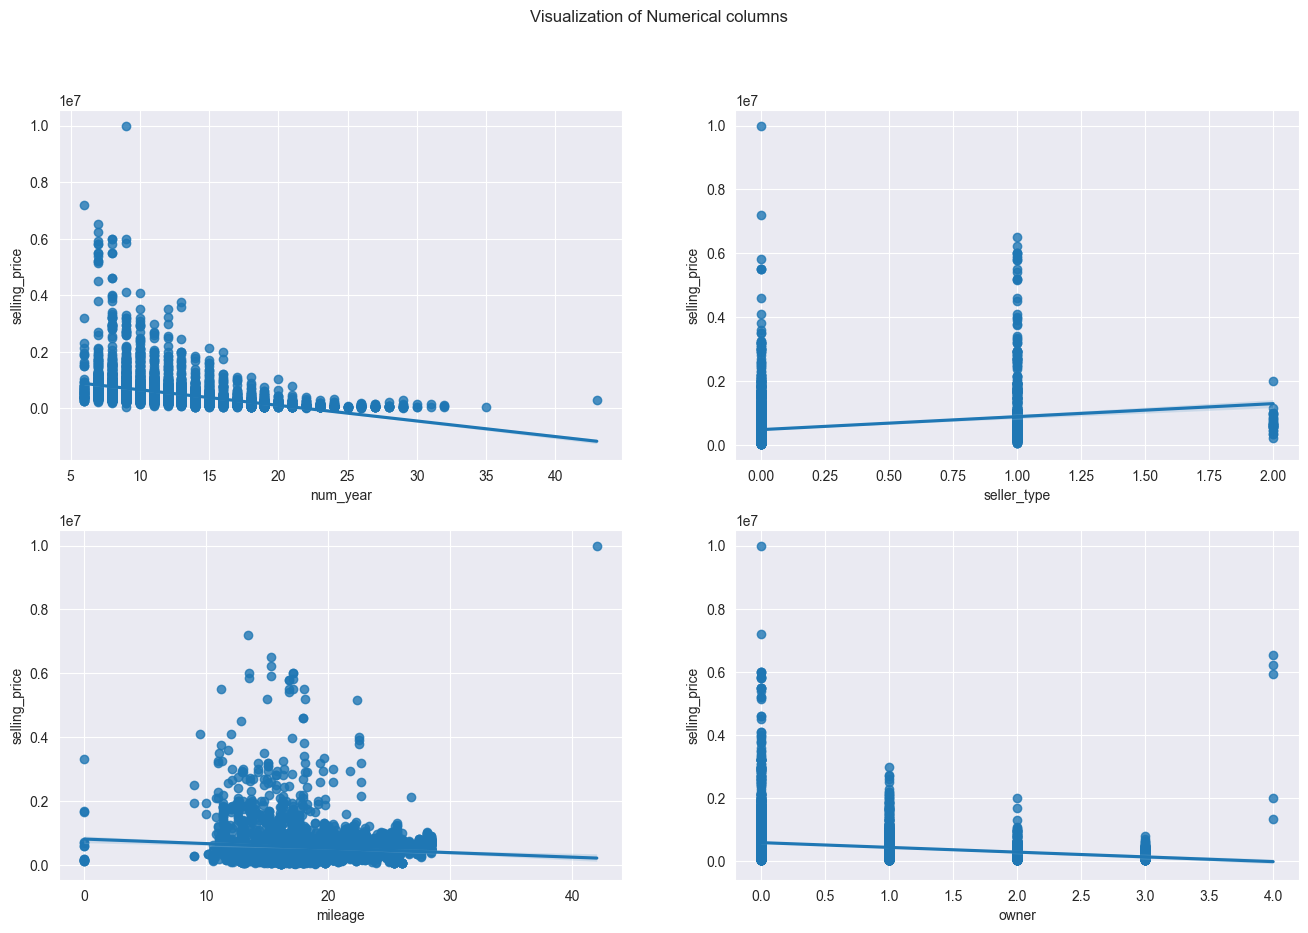

In [172]:
# a grid of 4 subplots with 2 * 2 arrays of axes
fig, axes = plt.subplots(2, 2, figsize = (16,10))
# super title
fig.suptitle('Visualization of Numerical columns')

sns.regplot(x = 'num_year', y = 'selling_price', data = df, ax = axes[0,0])
sns.regplot(x = 'seller_type', y = 'selling_price', data = df, ax = axes[0,1])
sns.regplot(x = 'mileage', y = 'selling_price', data = df, ax = axes[1,0])
sns.regplot(x = 'owner', y = 'selling_price', data = df, ax = axes[1,1])
plt.show()